In [322]:
pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC  # Importing the Support Vector Classifier
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.datasets import load_iris  # Example dataset
from sklearn.preprocessing import StandardScaler  # For scaling data (optional)
from sklearn.metrics import accuracy_score  # For evaluating the model


In [324]:
# load data 
df = pd.read_csv("digitraffic_weather_balanced_ver1_2025.csv")

In [325]:
df.duplicated().sum()

36

In [326]:
df = df.drop_duplicates()

In [327]:
df['condition'].value_counts()

Rain      595
Normal    570
Snow      511
Ice       415
Name: condition, dtype: int64

In [328]:
df.isna().sum()

dew_point           0
avg_wind            0
humidity            0
rain                0
rain_sum            0
snow_depth          0
rain_amount         0
snow_amount         0
ice_measure         0
friction            0
ice_frequency       0
mean_temperature    0
condition           0
dtype: int64

In [329]:
# map the target variable and save the names into a list
mapping = {"Ice": 0, "Normal": 1, "Rain": 2, "Snow": 3}
df['condition'] = df['condition'].map(mapping)
labels = ["Ice", "Normal", "Rain", "Snow"]

In [330]:
# a small trick => use everything else except, the target
X = df.drop("condition", axis=1)

# our target variable is y
y = df['condition']

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [332]:
# try a different algorithm here + remember to import the used algorithm!
model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0, random_state=42))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', random_state=42))])

In [338]:
# time measurement code from ChatGPT originally
import time

# Record the start time
start_time = time.time()

# Perform the prediction
predictions = model.predict(X_test)

# Record the end time
end_time = time.time()

# Calculate the total time taken
total_time = end_time - start_time

# Print the total time
print(f"Total time for predictions: {total_time:.4f} seconds")

Total time for predictions: 0.0030 seconds


In [334]:
# get the test predictions for metrics as usual
predictions = model.predict(X_test)

In [335]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions, target_names=labels))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

         Ice       0.91      0.92      0.91        96
      Normal       0.92      0.95      0.94       160
        Rain       0.96      0.86      0.91       155
        Snow       0.89      0.96      0.92       112

    accuracy                           0.92       523
   macro avg       0.92      0.92      0.92       523
weighted avg       0.92      0.92      0.92       523


Model overall accuracy: 92.16%


[[ 88   0   2   6]
 [  4 152   2   2]
 [  2  13 134   6]
 [  3   0   1 108]]


<Axes: >

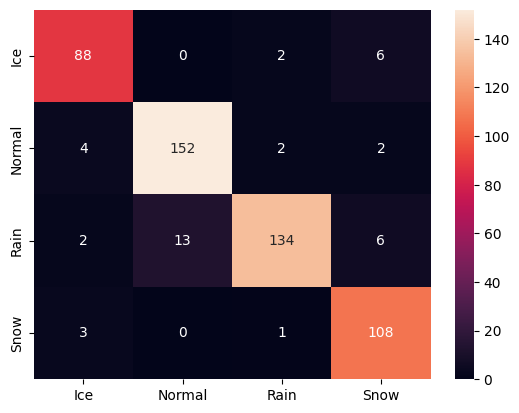

In [336]:
print(confusion_matrix(y_test, predictions))

# if you want a more graphical version of this, try:
# the fmt-parameter will change to decimal format from scientific format
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g', xticklabels=labels, yticklabels=labels)